<img src="images/stock.jpg">

### <font color=blue>Importing required libraries</font>

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, y, test_size=test_size) #cross validation 

    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;

### <font color=blue>Loading dataset</font>

In [3]:
df = pd.read_csv("input/prices.csv") 
df=df[df.symbol=='GOOG']

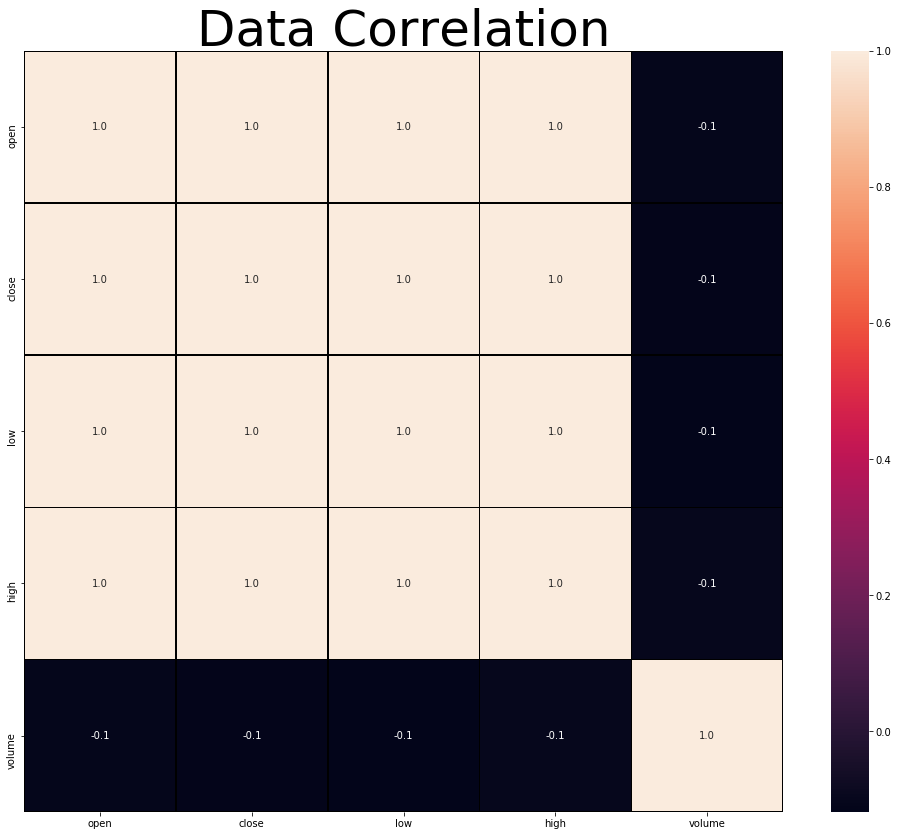

In [4]:
plt.subplots(figsize=(17,14))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Data Correlation",fontsize=50)
plt.show()

In [5]:
forecast_col = 'close'
forecast_out = 5 
test_size = 0.2

### <font color=blue>Prediction</font>

In [6]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size)

In [7]:
learner = linear_model.LinearRegression()

In [8]:
learner.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
score=learner.score(X_test,Y_test)
learner.score(X_test,Y_test)

0.9853994191424416

In [13]:
forecast= learner.predict(X_lately)

In [14]:
response={}
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.9853994191424416, 'forecast_set': array([786.00237775, 787.58016694, 781.32679136, 779.15253116,
       768.5987852 ])}
